<a href="https://colab.research.google.com/github/FahrialSepIrvano/DataMining/blob/main/TugasDataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import Markdown, display

display(Markdown("""
# Proyek: Lymphography (CRISP-DM singkat)

**Business Understanding**
Tujuan: Buat model klasifikasi tipe diagnosis dari dataset `lymphography` untuk membantu prioritisasi medis.
Deliverable: notebook, visual (distribusi kelas, feature importance, confusion matrix), model tersimpan, dan ringkasan rekomendasi.
"""))



# Proyek: Lymphography (CRISP-DM singkat)

**Business Understanding**
Tujuan: Buat model klasifikasi tipe diagnosis dari dataset `lymphography` untuk membantu prioritisasi medis.
Deliverable: notebook, visual (distribusi kelas, feature importance, confusion matrix), model tersimpan, dan ringkasan rekomendasi.


Shape dataset: (148, 19)


,class,lymphatics,block_of_afferent,block_of_lymph_c,block_of_lymph_s,bypass,extravasates,regeneration,early_uptake,lymph_nodes_dim,lymph_nodes_enlarg,changes_in_lymph,defect_in_node,changes_in_node,changes_in_structure,special_forms,dislocation,exclusion_of_node,num_nodes_bins
0,3,4,2,1,1,1,1,1,2,1,2,2,2,4,8,1,1,2,2
1,2,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
2,3,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
3,3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
4,2,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1



Distribusi class:
class
1     2
2    81
3    61
4     4
Name: count, dtype: int64

Distribusi lymphatics:
lymphatics
1     2
2    67
3    46
4    33
Name: count, dtype: int64

Distribusi block_of_afferent:
block_of_afferent
1    66
2    82
Name: count, dtype: int64

Distribusi changes_in_structure:
changes_in_structure
1     2
2    14
3    19
4    31
5    28
6     2
7     7
8    45
Name: count, dtype: int64

Distribusi num_nodes_bins:
num_nodes_bins
1    57
2    37
3    18
4    10
5     8
6     8
7     8
8     2
Name: count, dtype: int64


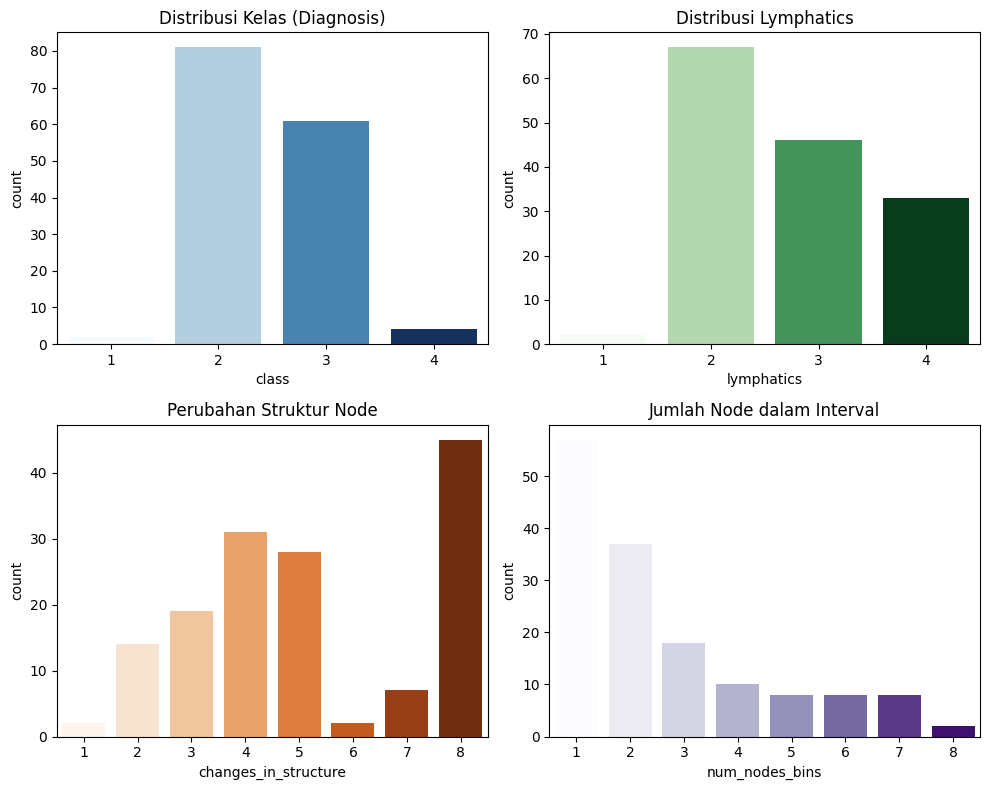

In [ ]:
# Cell 2 - Data Understanding yang lebih informatif (tanpa warning)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = "/content/lymphography.data"
df = pd.read_csv(path, header=None, sep=',')

# Nama kolom sesuai dokumentasi
col_names = [
    "class", "lymphatics", "block_of_afferent", "block_of_lymph_c", "block_of_lymph_s",
    "bypass", "extravasates", "regeneration", "early_uptake", "lymph_nodes_dim",
    "lymph_nodes_enlarg", "changes_in_lymph", "defect_in_node", "changes_in_node",
    "changes_in_structure", "special_forms", "dislocation", "exclusion_of_node",
    "num_nodes_bins"
]
df.columns = col_names

print("Shape dataset:", df.shape)
display(df.head())

# Fokus value counts hanya untuk kolom kunci
key_cols = ["class", "lymphatics", "block_of_afferent", "changes_in_structure", "num_nodes_bins"]
for c in key_cols:
    print(f"\nDistribusi {c}:")
    print(df[c].value_counts().sort_index())

# === Visual penting (pakai hue=col & legend=False untuk hilangkan warning) ===
fig, axes = plt.subplots(2, 2, figsize=(10,8))

sns.countplot(x="class", hue="class", data=df, ax=axes[0,0], palette="Blues", legend=False)
axes[0,0].set_title("Distribusi Kelas (Diagnosis)")

sns.countplot(x="lymphatics", hue="lymphatics", data=df, ax=axes[0,1], palette="Greens", legend=False)
axes[0,1].set_title("Distribusi Lymphatics")

sns.countplot(x="changes_in_structure", hue="changes_in_structure",
              data=df, ax=axes[1,0], palette="Oranges", legend=False)
axes[1,0].set_title("Perubahan Struktur Node")

sns.countplot(x="num_nodes_bins", hue="num_nodes_bins",
              data=df, ax=axes[1,1], palette="Purples", legend=False)
axes[1,1].set_title("Jumlah Node dalam Interval")

plt.tight_layout()
plt.show()


In [ ]:
# Cell 3 - Persiapan fitur & mutual information (fitur penting)
from sklearn.feature_selection import mutual_info_classif
X = df.iloc[:, :-1].apply(pd.to_numeric, errors='coerce').fillna(0)
y = df.iloc[:, -1]
y_enc, uniques = pd.factorize(y)

mi = mutual_info_classif(X, y_enc, random_state=42)
mi_s = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print("Top 6 fitur menurut Mutual Information:\n", mi_s.head(6))

# Pilih fitur top-8 untuk model sederhana (feature selection)
top_feats = mi_s.head(8).index.tolist()
X_sel = X[top_feats]
print("\nFitur yang dipakai:", top_feats)


Top 6 fitur menurut Mutual Information:
 class                   0.257167
exclusion_of_node       0.246460
special_forms           0.163144
lymph_nodes_enlarg      0.160929
changes_in_structure    0.127914
early_uptake            0.106278
dtype: float64

Fitur yang dipakai: ['class', 'exclusion_of_node', 'special_forms', 'lymph_nodes_enlarg', 'changes_in_structure', 'early_uptake', 'block_of_lymph_s', 'dislocation']


SMOTE diaktifkan untuk final model training (k_neighbors=1).

Distribusi kelas terenkode:
{np.int64(0): np.int64(37), np.int64(1): np.int64(8), np.int64(2): np.int64(8), np.int64(3): np.int64(57), np.int64(4): np.int64(10), np.int64(5): np.int64(8), np.int64(6): np.int64(18), np.int64(7): np.int64(2)}

Classification report (test):
               precision    recall  f1-score   support

           0       0.40      0.29      0.33         7
           1       0.00      0.00      0.00         2
           2       0.50      0.50      0.50         2
           3       0.64      0.82      0.72        11
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         4

    accuracy                           0.40        30
   macro avg       0.22      0.23      0.22        30
weighted avg       0.36      0.40      0.38        30



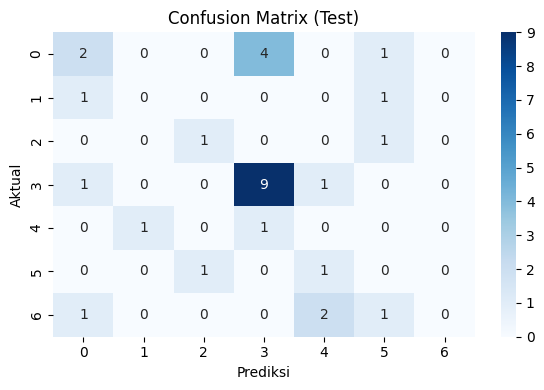

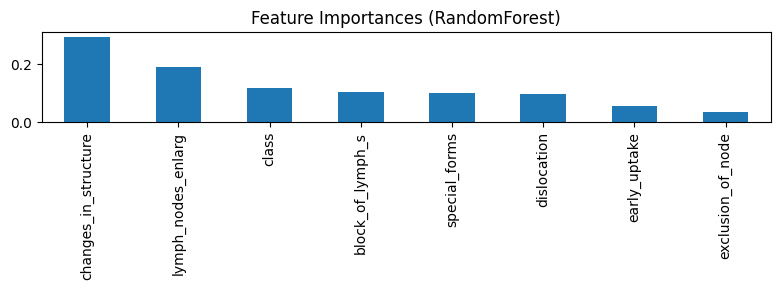

Top features: {'changes_in_structure': 0.29417090754134284, 'lymph_nodes_enlarg': 0.19160184563376706, 'class': 0.11800178359151774, 'block_of_lymph_s': 0.10503075058221346, 'special_forms': 0.10122807922364582, 'dislocation': 0.09716317371407804}
CV Macro-F1 (2-fold, tanpa SMOTE): mean=0.158 std=0.020
Model tersimpan: /content/lymphography_model.joblib


In [ ]:
# Cell 4 - Model cepat (RandomForest), evaluasi, simpan

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Split stratified
Xtr, Xte, ytr, yte = train_test_split(X_sel, y_enc, test_size=0.2, stratify=y_enc, random_state=42)

# Default pipeline without SMOTE for cross-validation
pipe_cv = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
)

# Pipeline with SMOTE for final model training
pipe_final = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
)


# Check if SMOTE can be used
use_smote = False
min_samples = np.min(np.bincount(y_enc))
if min_samples > 1:
    try:
        from imblearn.pipeline import Pipeline as ImbPipeline
        from imblearn.over_sampling import SMOTE
        # Set k_neighbors for SMOTE to be min_samples - 1, but at least 1
        smote_k_neighbors = max(1, min_samples - 1)
        pipe_final = ImbPipeline([
            ('imp', SimpleImputer(strategy='median')),
            ('sc', StandardScaler()),
            ('sm', SMOTE(random_state=42, k_neighbors=smote_k_neighbors)),
            ('rf', RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42))
        ])
        use_smote = True
        print(f"SMOTE diaktifkan untuk final model training (k_neighbors={smote_k_neighbors}).")
    except ImportError:
        print("SMOTE tidak tersedia — melanjutkan tanpa SMOTE.")
else:
     print(f"SMOTE requires at least 2 samples for minority classes (found {min_samples}). Continuing without SMOTE.")


# Print encoded class distributions
print("\nDistribusi kelas terenkode:")
unique, counts = np.unique(y_enc, return_counts=True)
print(dict(zip(unique, counts)))


# Latih & prediksi (gunakan pipe_final dengan SMOTE jika diaktifkan)
pipe_final.fit(Xtr, ytr)
yhat = pipe_final.predict(Xte)
print("\nClassification report (test):\n", classification_report(yte, yhat, zero_division=0))

# Confusion matrix visual
cm = confusion_matrix(yte, yhat)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Test)")
plt.xlabel("Prediksi"); plt.ylabel("Aktual")
plt.tight_layout(); plt.show()

# Feature importances
try:
    # Ambil estimator RF dari pipeline
    rf = None
    if hasattr(pipe_final, "named_steps"):
        rf = pipe_final.named_steps.get('rf') or pipe_final.named_steps.get('randomforestclassifier')
    if rf is not None:
        importances = rf.feature_importances_
        fi = pd.Series(importances, index=X_sel.columns).sort_values(ascending=False)
        plt.figure(figsize=(8,3))
        fi.head(10).plot(kind='bar')
        plt.title("Feature Importances (RandomForest)")
        plt.tight_layout(); plt.show()
        print("Top features:", fi.head(6).to_dict())
except Exception:
    print("Tidak bisa ambil feature importances dari pipeline.")

# Cross-validated macro-F1 (gunakan pipe_cv tanpa SMOTE)
n_splits_cv = 5
min_samples_cv = np.min(np.bincount(y_enc))

# Ensure n_splits_cv does not exceed the minimum number of samples in any class
if min_samples_cv < n_splits_cv:
    n_splits_cv = min_samples_cv

# Ensure n_splits is at least 2 for StratifiedKFold
if n_splits_cv < 2:
    print("Minimum number of samples in a class is less than 2. Cannot perform cross-validation.")
    scores = np.array([np.nan]) # Indicate that cross-validation could not be performed
else:
    cv = StratifiedKFold(n_splits=n_splits_cv, shuffle=True, random_state=42)
    scores = cross_val_score(pipe_cv, X_sel, y_enc, cv=cv, scoring='f1_macro') # Use pipe_cv here
    print(f"CV Macro-F1 ({n_splits_cv}-fold, tanpa SMOTE): mean=%.3f std=%.3f" % (scores.mean(), scores.std()))


# Simpan model (simpan pipe_final dengan SMOTE jika diaktifkan)
joblib.dump(pipe_final, "/content/lymphography_model.joblib")
print("Model tersimpan: /content/lymphography_model.joblib")

In [ ]:
# Cell 5 - Ringkasan CRISP-DM & contoh prediksi pakai model

import joblib

# Ringkasan CRISP-DM
print("=== Ringkasan singkat (CRISP-DM) ===")
print("- Business Understanding : Prediksi tipe diagnosis dari lymphography untuk bantu prioritas klinis.")
print("- Data Understanding     : 148 baris × 19 kolom; label di kolom terakhir; kelas tidak seimbang (lihat visual).")
print("- Data Preparation       : pilih fitur informatif (MI top-8), imputasi median, scaling; opsi SMOTE untuk imbalance.")
print("- Modeling               : RandomForest (class_weight='balanced'), pipeline reproducible.")
print("- Evaluation             : tampilkan classification report, confusion matrix, CV macro-F1.")
print("- Deployment             : model disimpan di '/content/lymphography_model.joblib'.")

# Contoh memuat model dan melakukan prediksi pada 1 sampel
m = joblib.load("/content/lymphography_model.joblib")

# gunakan top_feats dari Cell 3 (pastikan sudah didefinisikan)
sample = df.iloc[[0]][top_feats]
pred = m.predict(sample)
print("\nContoh prediksi pada 1 baris data pertama:")
print("Input fitur:", sample.values.tolist())
print("Prediksi kelas:", pred)


=== Ringkasan singkat (CRISP-DM) ===
- Business Understanding : Prediksi tipe diagnosis dari lymphography untuk bantu prioritas klinis.
- Data Understanding     : 148 baris × 19 kolom; label di kolom terakhir; kelas tidak seimbang (lihat visual).
- Data Preparation       : pilih fitur informatif (MI top-8), imputasi median, scaling; opsi SMOTE untuk imbalance.
- Modeling               : RandomForest (class_weight='balanced'), pipeline reproducible.
- Evaluation             : tampilkan classification report, confusion matrix, CV macro-F1.
- Deployment             : model disimpan di '/content/lymphography_model.joblib'.

Contoh prediksi pada 1 baris data pertama:
Input fitur: [[3, 2, 1, 2, 8, 2, 1, 1]]
Prediksi kelas: [0]
